In [1]:
# Make sure results are repeatable
from numpy.random import seed
seed(0)
from tensorflow import set_random_seed
set_random_seed(0)

In [2]:
# Create generators to wrap images and labels
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    directory='./Images/train',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    seed=3
)

test_generator = test_datagen.flow_from_directory(
    directory='./Images/test',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    seed=3
)

Using TensorFlow backend.


Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


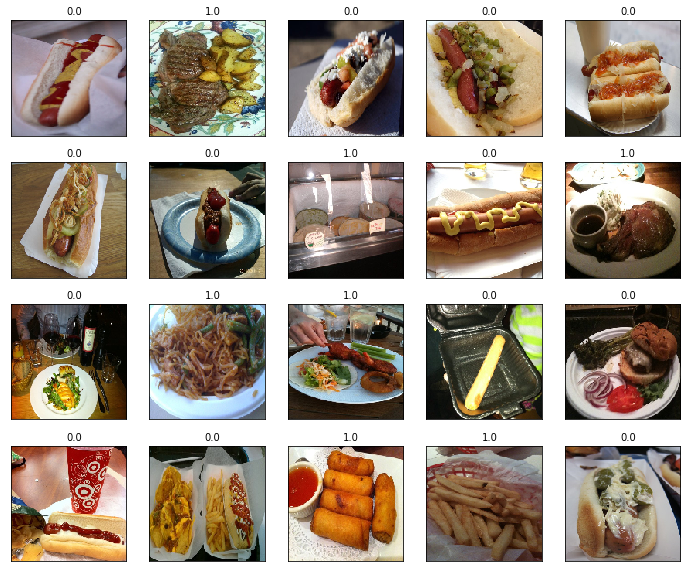

In [3]:
# Plot the first 20 training images and show the corresponding labels
%matplotlib inline
import matplotlib.pyplot as plt

images = train_generator[0][0] # First 20 images
labels = train_generator[0][1] # First 20 labels
fig, axes = plt.subplots(4, 5, figsize=(12, 10), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap=plt.cm.gray_r)
    ax.text(0.48, 1.05, str(labels[i]), transform=ax.transAxes)

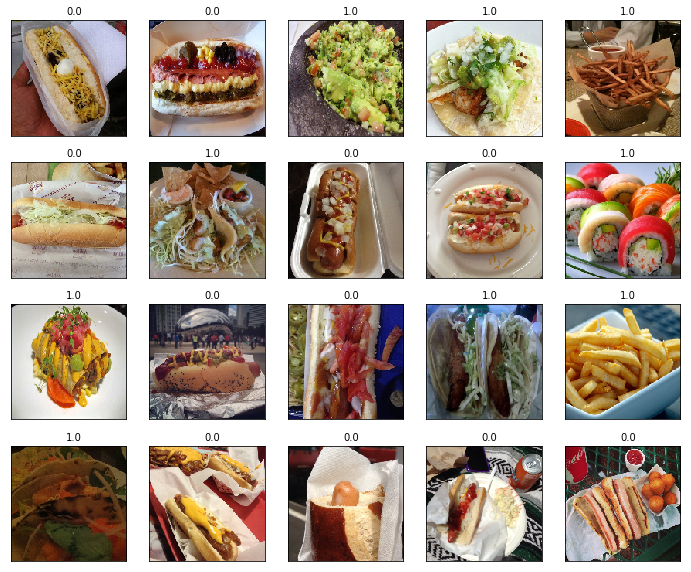

In [4]:
# Plot the first 20 test images and show the corresponding labels
images = test_generator[0][0] # First 20 images
labels = test_generator[0][1] # First 20 labels
fig, axes = plt.subplots(4, 5, figsize=(12, 10), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap=plt.cm.gray_r)
    ax.text(0.48, 1.05, str(labels[i]), transform=ax.transAxes)

In [5]:
# Create a convolutional neural network with a sigmoid output layer for binary classification
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import RMSprop

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 128)       36992     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)             0         
__________

In [6]:
# Train the model
hist = model.fit_generator(
    train_generator,
    #steps_per_epoch=40, # 40 batches * (20 images per batch) = 800
    steps_per_epoch=10, # 10 batches * (20 images per batch) = 200
    validation_data=test_generator,
    validation_steps=10,
    epochs=50
)

Epoch 1/50
10/10 [==============================] - 82s 8s/step - loss: 0.7086 - acc: 0.4700 - val_loss: 0.6911 - val_acc: 0.4900
Epoch 2/50
10/10 [==============================] - 74s 7s/step - loss: 0.6969 - acc: 0.5250 - val_loss: 0.6915 - val_acc: 0.5150
Epoch 3/50
10/10 [==============================] - 63s 6s/step - loss: 0.6897 - acc: 0.5650 - val_loss: 0.6884 - val_acc: 0.6050
Epoch 4/50
10/10 [==============================] - 67s 7s/step - loss: 0.6866 - acc: 0.5350 - val_loss: 0.6919 - val_acc: 0.5000
Epoch 5/50
10/10 [==============================] - 69s 7s/step - loss: 0.6833 - acc: 0.5600 - val_loss: 0.6857 - val_acc: 0.5800
Epoch 6/50
10/10 [==============================] - 61s 6s/step - loss: 0.6862 - acc: 0.5650 - val_loss: 0.6847 - val_acc: 0.5350
Epoch 7/50
10/10 [==============================] - 49s 5s/step - loss: 0.6832 - acc: 0.5500 - val_loss: 0.6811 - val_acc: 0.6000
Epoch 8/50
10/10 [==============================] - 52s 5s/step - loss: 0.6843 - acc: 0.55

[]

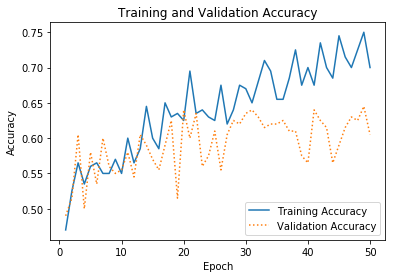

In [7]:
# Plot training accuracy and validation accuracy over time
acc = hist.history['acc']
val_acc = hist.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [8]:
# Evaluate the model's accuracy with 20 test images
scores = model.evaluate(test_generator[0][0], test_generator[0][1], verbose=0) 
print("Accuracy: %.2f%%" % (scores[1] * 100))

Accuracy: 65.00%
